# Статистика, DS-поток
## Задание SP.6

**Правила:**

* Дедлайны см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Выполненную работу нужно отправить телеграм-боту `@miptstats_ds23_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. Дождитесь подтверждения от бота, что он принял файл. Если подтверждения нет, то что-то не так. **Работы, присланные иным способом, не принимаются.**
* Дедлайны см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно **ноутбук в формате `ipynb`**.
* Следите за размером файлов. **Бот не может принимать файлы весом более 20 Мб.** Если файл получается больше, заранее разделите его на несколько.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания получат штраф.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*
* В каждой задаче не забывайте делать **пояснения и выводы**.
* **Код из рассказанных на занятиях ноутбуков** можно использовать без ограничений.

**Баллы за задание:**

* Задача 1 &mdash;  70 баллов
* Задача 2 &mdash;  50 баллов
* Задача 3 &mdash;  200 баллов

**Важность задач:**

* *высокая:* задачи 1, 2, 3.

Степень важности задач не связана с количеством баллов и определяется только на основе оценки полезности задачи с точки зрения усвоения текущего и дальнейшего материала. Например, если вы что-то не успеваете, рекомендуется в первую очередь выполнять более важные задачи.

Почему все задачи высокой степени? Просто остальные убрали :)

<b><font size="5">Дорешка:</font></b>

* <b><font size="4">Задача 1</font></b>
  * <b><font color="#f09000" size="3">Решение с нуля</font></b>

* <b><font size="4">Задача 3</font></b>
  * <b><font color="#00b565" size="3">Исправил формулы и код в пунктe 2</font></b>

*Примечание*
* <b><font color="#00b565">#00b565 &mdash; цвет для исправления замечаний</font></b>
* <b><font color="#f09000">#f09000 &mdash; цвет для решений с нуля</font></b>
* проверяющий может иначе классифицировать эти два типа дорешек

In [ ]:
# Bot check

# HW_ID: ds_sp6
# Бот проверит этот ID и предупредит, если случайно сдать что-то не то.

# Status: final
# Перед отправкой в финальном решении удали "not" в строчке выше.
# Так бот проверит, что ты отправляешь финальную версию, а не промежуточную.
# Никакие значения в этой ячейке не влияют на факт сдачи работы.

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as sps
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale=1.2, palette='Set2')

import kagglehub
import os
from tqdm import tqdm

______________
### Задача 1.

<b><font color="#f09000" size="5">Решение с нуля</font></b>

<b><font color="#f09000" size="3">Замечание:</font></b> <i>Наличие решения. Инд. комм. Нет решения</i>

В этой задаче нужно сделать оценку максимального правдоподобия для многомерного нормального распределения по датасету химимического анализа вин трех разных сортов в Италии.
Скачайте данные по ссылке https://archive.ics.uci.edu/ml/datasets/wine (файл `wine.data`) и загрузите их с помощью библиотеки pandas.

In [70]:
data = pd.read_csv("wine/wine.data", header=None)
data.columns = ["Class","Alcohol","Malic acid","Ash","Alcalinity of ash","Magnesium","Total phenols","Flavanoids","Nonflavanoid phenols","Proanthocyanins","Color intensity","Hue","OD280/OD315 of diluted wines","Proline"]
data.sample(2)

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
107,2,12.72,1.75,2.28,22.5,84,1.38,1.76,0.48,1.63,3.3,0.88,2.42,488
106,2,12.25,1.73,2.12,19.0,80,1.65,2.03,0.37,1.63,3.4,1.00,3.17,510


Пусть выборка $X = (X_1, ..., X_n)$ такова, что каждый ее элемент имеет многомерное нормальное распределение со средним вектором $a \in \mathbb {R} ^d$ и матрицей ковариаций $\Sigma \in \mathbb {R} ^ {d \times d}$.

Запишите оценку максимального правдоподобия для параметров $a$ и $\Sigma$.

***Ответ:***  
$L(a,\Sigma) = \displaystyle\prod_{i=1}^{n} \left( |\Sigma| (2\pi)^n \right)^{-1/2} e^{-\frac{1}{2} (x-a)^T \Sigma^{-1} (x-a)} = \left( |\Sigma| (2\pi)^n \right)^{-n/2} \exp\left(-\frac{1}{2} \displaystyle\sum_{i=1}^{n} (x-a)^T \Sigma^{-1} (x-a)\right)$  
$l(a,\Sigma) = \ln{L(a,\Sigma)} = -\frac{n}{2}\ln{|\Sigma|} - \frac{n^2}{2}\ln{2\pi} -\frac{1}{2} \displaystyle\sum_{i=1}^{n} (x-a)^T \Sigma^{-1} (x-a)$  
*ОМП:* $\frac{\partial l(a,\Sigma)}{\partial a} = 0 \Rightarrow \widehat{a} = \overline{X}$, и  $\frac{\partial l(a,\Sigma)}{\partial \Sigma} = 0 \Rightarrow \widehat{\Sigma} = \overline{(X-\overline{X})(X-\overline{X})^T}$  
*Производные посчитаны с учетом знаний из теории оптимизации (очень похожие задачи были в дз по тому предмету)*  

Рассмотрим колонки "Alcalinity of ash", "Nonflavanoid phenols", "Proanthocyanins", "Hue" для всех сортов вина вместе.
Предположим, что данные в них образуют выборку из многомерного нормального распределения с неизвестными параметрами, которые вам нужно оценить.

Визуализируйте рассматриваемые данные с помощью `seaborn.pairplot`, чтобы убедиться в том, что данные визуально похожи на нормальное распределение:

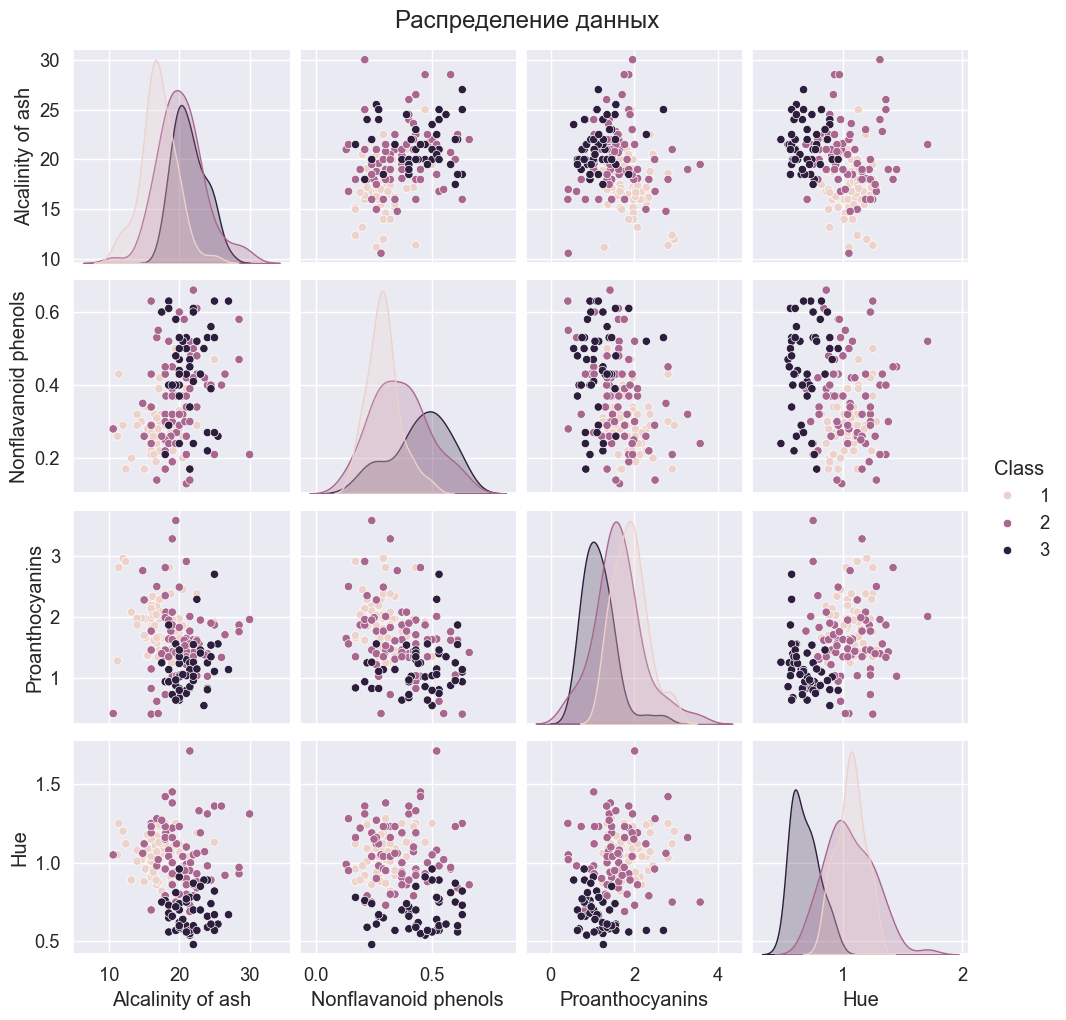

In [71]:
ax = sns.pairplot(data, vars=["Alcalinity of ash","Nonflavanoid phenols","Proanthocyanins","Hue"], hue="Class")
ax.fig.suptitle('Распределение данных', y=1.02)
plt.show()

Напишите функцию подсчета оценки максимального правдоподобия для вектора средних $a$ и матрицы ковариаций $\Sigma$ по выборке. Использование циклов наказуемо.

In [72]:
mle_for_mean = lambda s: np.mean(s, axis=0).values  # где s - выборка
mle_for_cov_matrix = lambda s: ((s-mle_for_mean(s)).T @ (s-mle_for_mean(s))).values / len(s)
a, sigma = [f(data[["Alcalinity of ash","Nonflavanoid phenols","Proanthocyanins","Hue"]]) for f in [mle_for_mean, mle_for_cov_matrix]]

Визуализируйте полученный результат. Для каждой пары признаков постройте информативный график, на котором будут:

1. Точки выборки.

2. Плотность нормального распределения с оцененными параметрами, которую изобразите в виде линий уровня.

*Указание.* Используйте функции `plt.pcolormesh` и `plt.clabel`

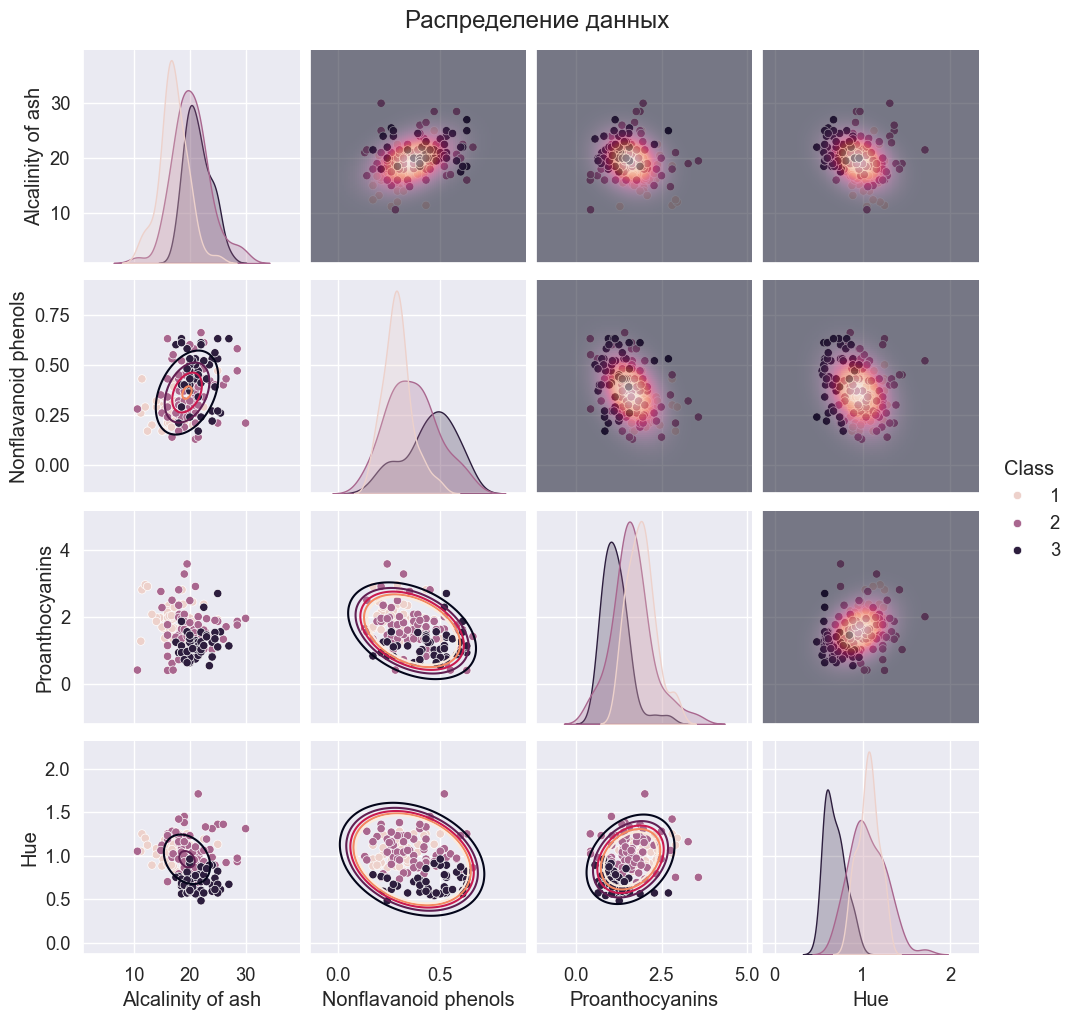

In [73]:
ax = sns.pairplot(data, vars=["Alcalinity of ash","Nonflavanoid phenols","Proanthocyanins","Hue"], hue="Class")
D = data[["Alcalinity of ash","Nonflavanoid phenols","Proanthocyanins","Hue"]].to_numpy()
delta = (D.max(axis=0)-D.min(axis=0)) / 2
for j in range(len(ax.axes)):  # добавим графики просто поверх pairplot
    for i in range(len(ax.axes)):
        mesh = np.mgrid[D[:,i].min()-delta[i]: D[:,i].max()+delta[i]:0.01, D[:,j].min()-delta[j]: D[:,j].max()+delta[j]:0.01]
        dens = sps.multivariate_normal(
            a[[i,j]], np.array([[sigma[i,i],sigma[i,j]], [sigma[j,i],sigma[j,j]]]) + np.eye(2)*1e-7  # иначе вырождалась
        ).pdf(np.dstack(mesh))
        if i>j:
            ax.axes[j,i].pcolormesh(*mesh, dens, alpha=0.5)
        if i<j:
            ax.axes[j,i].contour(*mesh, dens, [0.1, 0.2, 0.3, 0.4, 0.5])
ax.fig.suptitle('Распределение данных', y=1.02)
plt.show()

***Вывод:** с помощью ОМП получаются довольно хорошие оценки, что подчеркивает ценность метода*

<b><font color="#f09000" size="5">===== Конец исправлений =====</font></b>

__________________
### Задача 2.

**1.** Загрузите <a href="https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database/">данные</a>, которые содержат набор медицинских исследований, проведенных в рамках исследования о наличии у пациента сахарного диабета. Пациенты относятся к индейскому племени Пима.

In [9]:
path = kagglehub.dataset_download("uciml/pima-indians-diabetes-database")
df = pd.read_csv(os.path.join(path, 'diabetes.csv'))

Выведите описательные статистики (метод `describe`) для всех признаков.  Округлите до второго знака после запятой.

In [36]:
desc = df.describe()
desc.loc['mean-median % diff'] = np.abs((desc.loc['mean']-desc.loc['50%'])/desc.loc['mean']*100)  # для наглядности относительную разницу выпишем явно
desc.round(2)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.00,768.00,768.00,768.00,768.00,768.00,768.00,768.00,768.00
mean,3.85,120.89,69.11,20.54,79.80,31.99,0.47,33.24,0.35
std,3.37,31.97,19.36,15.95,115.24,7.88,0.33,11.76,0.48
min,0.00,0.00,0.00,0.00,0.00,0.00,0.08,21.00,0.00
25%,1.00,99.00,62.00,0.00,0.00,27.30,0.24,24.00,0.00
50%,3.00,117.00,72.00,23.00,30.50,32.00,0.37,29.00,0.00
75%,6.00,140.25,80.00,32.00,127.25,36.60,0.63,41.00,1.00
max,17.00,199.00,122.00,99.00,846.00,67.10,2.42,81.00,1.00
mean-median % diff,21.98,3.22,4.19,12.00,61.78,0.02,21.06,12.76,100.00


Что можно сказать о наличии в данных выбросов, сравнивая выборочную медиану и выборочное среднее?

***Ответ:** медиана (квантиль 50%) и среднее (mean) очень близки во всех столбцах, кроме Insulin (отличие больше, чем вдвое) и Outcome (бинарный признак, ожидаемо). Кажется, что в данных мало выбросов, а те, что есть, сосредоточены в основном в столбце Insulin*

**2.** Теперь для каждого параметра постройте график ящиков с усами (`boxplot`), в котором ось `x` соответствует таргеты, а ось `y` — значениям параметра. Используйте функцию `seaborn.boxplot`.

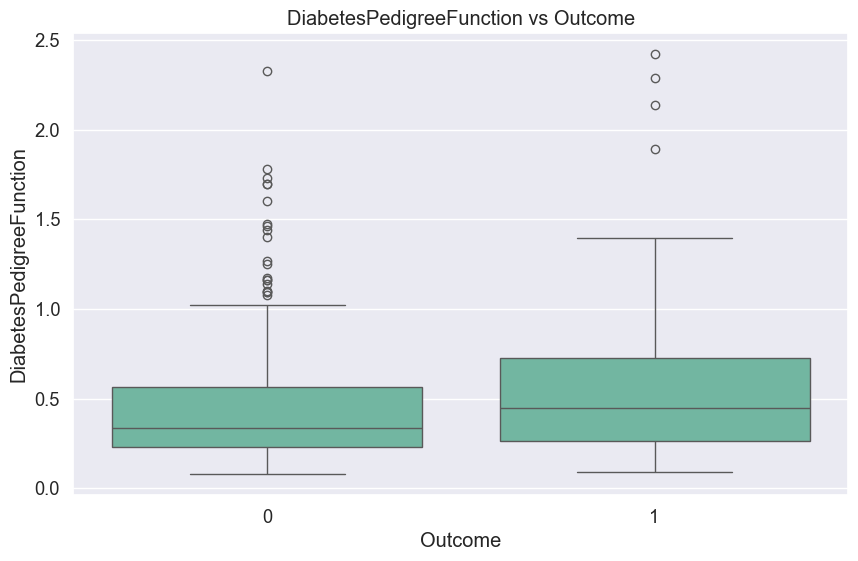

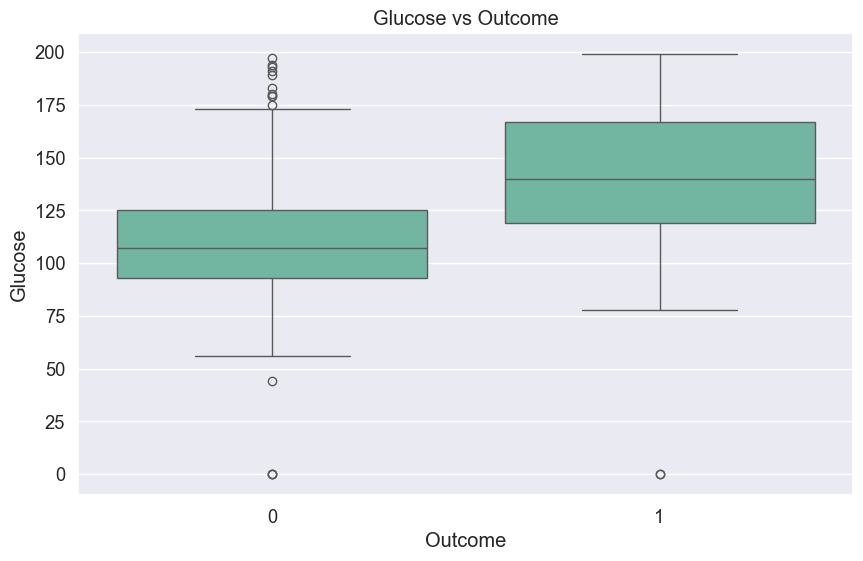

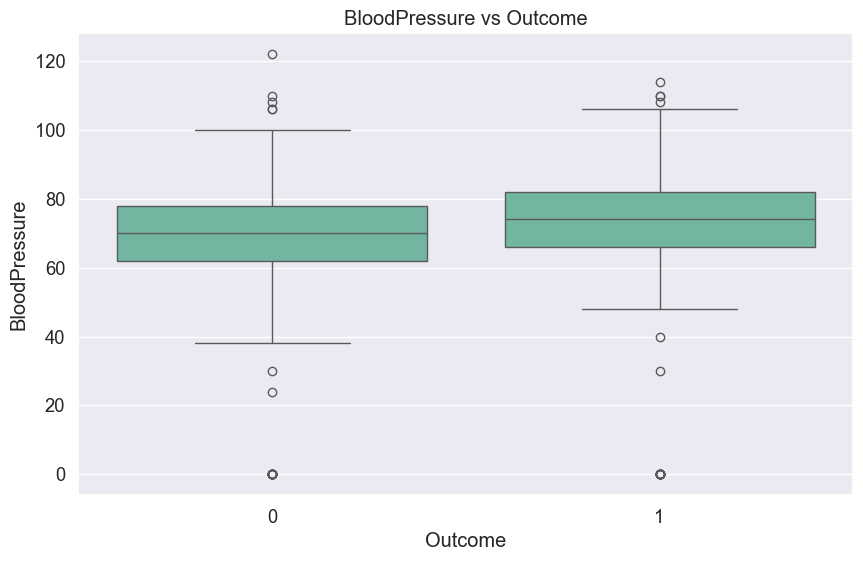

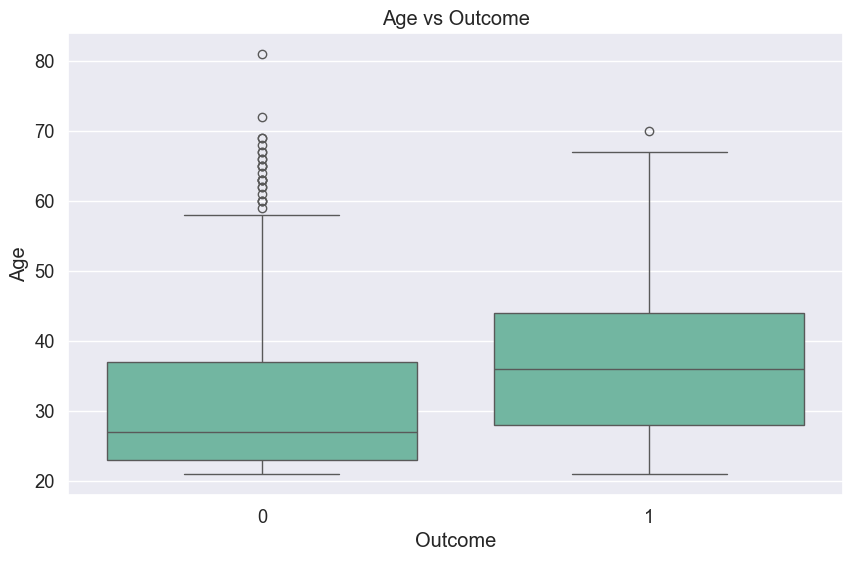

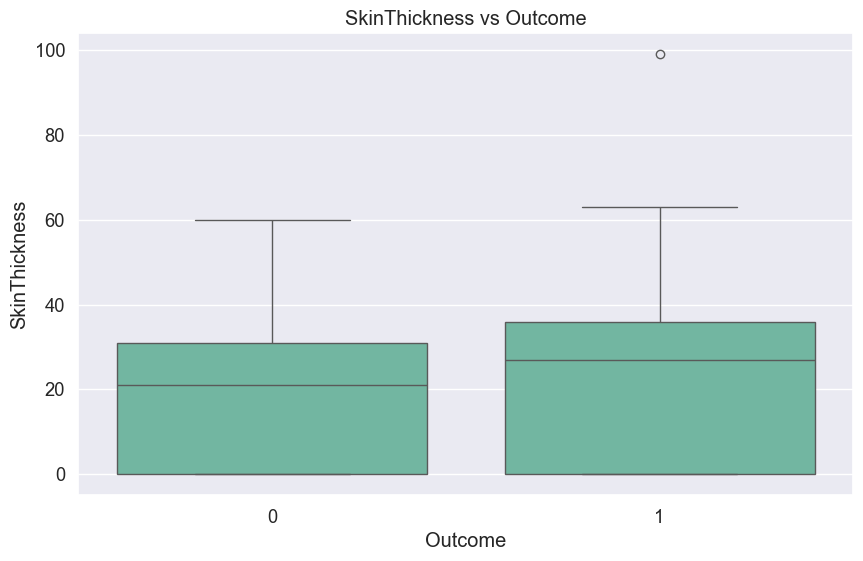

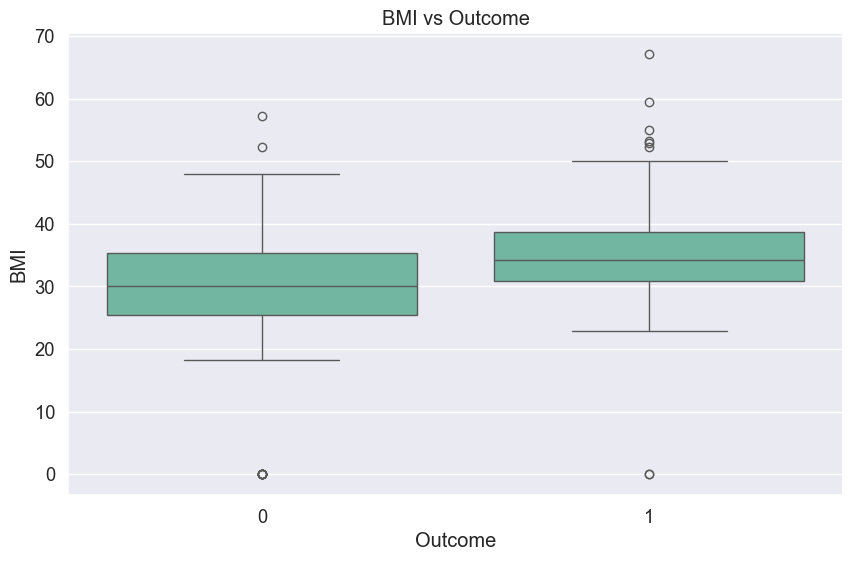

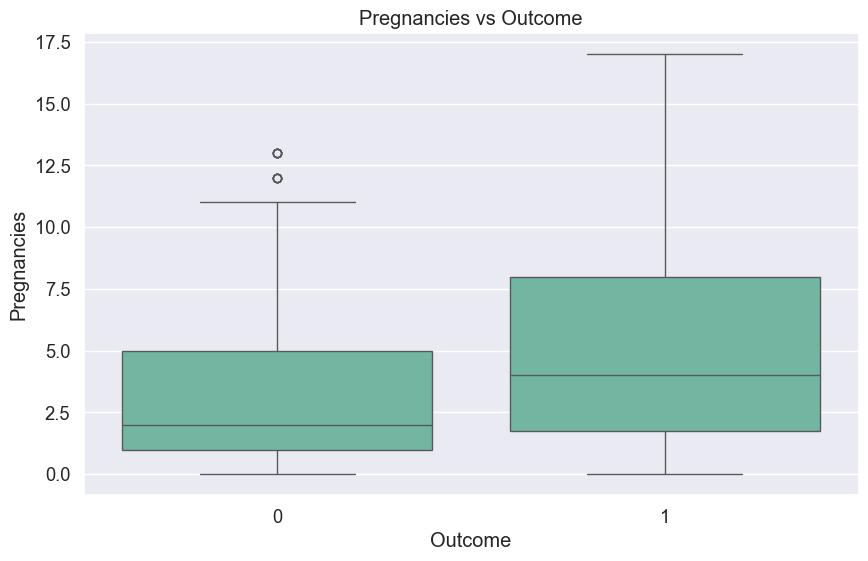

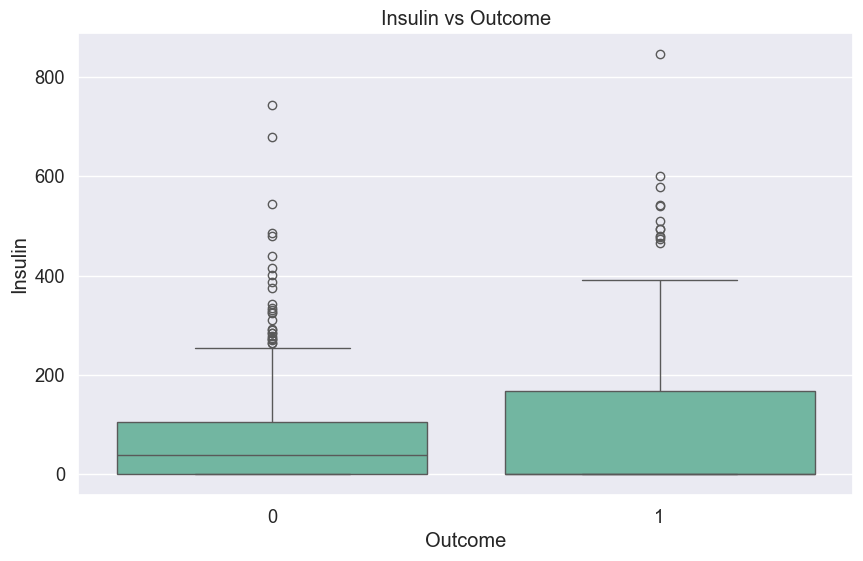

In [40]:
params = list(set(df.columns) - set(['Outcome']))
for param in params:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Outcome', y=param, data=df)
    plt.title(f'{param} vs Outcome')
    plt.xlabel('Outcome')
    plt.ylabel(param)
    plt.show()

Опишите структуру `boxplot`. Какие выводы можно сделать в данном случае?

***Ответ:***  
*Структура boxplot:*  
- *Сам ящик: прямоугольник, чья верхняя граница - квартиль Q3, нижняя граница - квартиль Q1, и по середине проведена медиана - квартиль Q2. Ясно, что ящик охватывает 50% данных из середины распределения*   
- *Усы: линии, обозначающие диапазон $\pm 1.5 \cdot IQR = \pm 1.5 \cdot (Q3-Q1)$ от границ ящика*  
- *Выбросы: точки за пределами усов*  
  
*В этом случае видно, что в данных довольно много выбросов (почти во всех столбцах). Также прослежиаются взаимосвязи между признаками и таргетом*  

**3.** Для параметра с наибольшим числом наблюдений, признанных выбросами, посчитайте и сравните: 
- выборочное среднее; 
- выборочную медиану;
- медиану средних Уолша.

Для реализации медианы средних Уолша без циклов обратите внимание на следующие **подсказки**:
1. Что будет, если вы сложите вектор-строку и вектор столбец одинакового размера?
2. Если вы правильно ответите на прошлый вопрос, вам пригодится `np.triu_indices_from`.

*На всякий случай, определим самый зашумленный параметр не на глаз, а точно*

In [58]:
desc.loc['IQR'] = desc.loc['75%'] - desc.loc['25%']
pd.DataFrame({p: np.sum(
    (df[p] > desc[p].loc['75%'] + 1.5*desc[p].loc['IQR']) +  # Q3 + 1.5 IQR
    (df[p] < desc[p].loc['25%'] - 1.5*desc[p].loc['IQR'])    # Q1 - 1.5 IQR
) for p in params}, index=['Кол-во выбросов'])

,DiabetesPedigreeFunction,Glucose,BloodPressure,Age,SkinThickness,BMI,Pregnancies,Insulin
Кол-во выбросов,29,5,45,9,1,19,4,34


*Параметром с наибольшим числом выбросов оказался BloodPressure*

In [70]:
def W(x):
    x = np.expand_dims(x.to_numpy(), 1)
    mat = (x+x.T)/2  # матрица, как в задаче 7 из дз ST6
    return np.median(mat[np.triu_indices_from(mat)])  # медиана эл-тов из треугольника

pd.DataFrame({
    'Выборочное среднее': [df['BloodPressure'].mean()],
    'Медиана средних Уолша': [W(df['BloodPressure'])],
    'Выборочная медиана': [df['BloodPressure'].median()],
}, index=['Значение']).round(2)

,Выборочное среднее,Медиана средних Уолша,Выборочная медиана
Значение,69.11,71.0,72.0


*Получилось, что выборочное среднее (69) < медианы средних Уолша (71) < выборочной медианы (72)*

Какими свойствами статистик вызваны наблюдаемые различия?

***Ответ:** различия вызваны разной асимптотической толерантностью (мерой робастности) статистик. В частности, асимптотическая толерантность выборочного среднего равна 0, медианы средних Уолша - 0.29, выборочной медианы - 0.5*

Сделайте выводы о полезности робастных статистик, методах визуального анализа и о наличии независимых одинаково распределённых случайных величин в реальном мире.

***Вывод:** робастные статистики крайне полезны, если в выборке ожидается некоторая доля выбросов (а на практике оказывается, что выбросы встречаются почти всегда). Тогда с помощью робастных статистик получается делать надежные выводы о данных, несмотря на шум. Ящик с усами помогает визуализировать возможные выбросы, благодаря чему можно понять, насколько сильно робастные статистики важны в конкретной задаче. Норсв в реальном мире скорее не сущестует, как и любой математической абстракции\идеализации. Однако, если допустить некоторую долю погрешности, то иногда удобно считать случайные величины норсв для упрощения анализа.*  

______________
### Задача 3.


> *Указание.* При решении этой задачи посмотрите решения задач SP.2.3-4 и SP.3.1-2. Если потребуется, можно копировать код из своих решений этих задач или решений, которые выложены на вики.

Предлагается изучить свойства оценок параметра сдвига для распределения Коши, обладающего плотностью $$p_{\theta}(x) = \frac{1}{\pi \left(1 + \left(x- \theta\right)^2\right)}.$$

> Такое распределение встречается, к примеру, в следующей задаче. На высоте 1 метр от точки $\theta$ находится источник $\gamma$-излучения, 
причем направления траекторий $\gamma$-квантов случайны, т.е. равномерно распределены по полуокружности. Тогда $X_i, i=1,...,n$ — зарегистрированные координаты точек пересечения $\gamma$-квантов с поверхностью детекторной плоскости — образуют выборку из распределения Коши со сдвигом $\theta$.
>
> В анализе данных такое распределение применяться для получения робастных процедур.

**1.** На отрезке $[-7, 7]$ постройте плотность стандартного нормального распределения и стандартного распределения Коши. Не забудьте добавить легенду.

**Решение:**

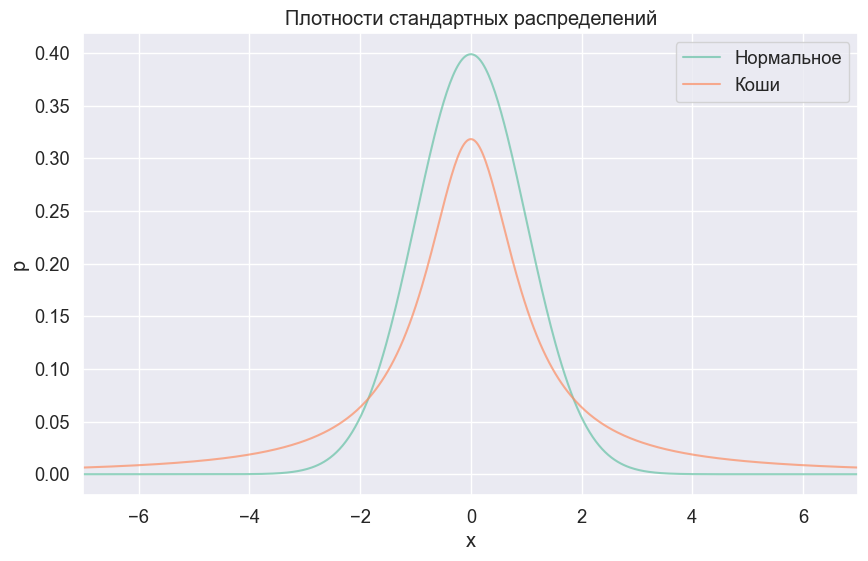

In [73]:
plt.figure(figsize=(10, 6))
x = np.linspace(-7, 7, 500)
plt.plot(x, sps.norm.pdf(x), label='Нормальное', alpha=0.7)
plt.plot(x, sps.cauchy.pdf(x), label='Коши', alpha=0.7)
plt.title('Плотности стандартных распределений')
plt.xlabel('x')
plt.ylabel('p')
plt.xlim(-7, 7)
plt.legend()
plt.show()

***Вывод:** по графику видно: в отличие от нормального, распределение Коши обладает очень тяжелыми хвостами (из-за чего, например, не имеет матожидания)*

**2.** Чему равна асимптотическая дисперсия $\sigma_{\alpha}^2$ усеченного среднего $\overline{X}_{\alpha}$, где $0 < \alpha < 1/2$, для распределения Коши? Помочь в ее вычислении может теорема, упомянутая на лекциях. Посчитайте асимптотическую дисперсию аналитически. Постройте график зависимости асимптотической дисперсии $\sigma_{\alpha}^2$ усеченного среднего $\overline{X}_{\alpha}$, где $0 < \alpha < 1/2$, от $\alpha$.

Настройте видимую область графика по оси *y* так, чтобы четко была отображена информативная часть графика. Отметьте на графике минимум функции.

<b><font color="#00b565" size="5">Исправил формулу и код</font></b>

<b><font color="#00b565" size="3">Замечание:</font></b> <i>  
▫️ 2 пункт: Ошибка в подсчете дисперсии. (-10.0)  
▫️ 2 пункт: /alpha найдено неверно. (-10.0)  
</i>  

*Было:* ~~$\sigma_{\alpha}^2 = \frac{\pi^2}{\sin^2{\left( \frac{\pi}{2} (1-2\alpha) \right)}}$~~  
*Стало: ознакомился с официальным решением, вроде теперь все понял. В общем, значение* $\sigma_{\alpha}^2 = \frac{2}{(1 - 2\alpha)^2} \left(\frac{\left(u_{1-\alpha} - \arctg u_{1-\alpha} \right)}{\pi} + \alpha u^2_{1 - \alpha} \right)$ 

*Было:* $(\sigma_{\alpha}^2)^{\prime} = \frac{-2 \pi^2}{\sin^3{\left( \frac{\pi}{2} (1-2\alpha) \right)}} \cdot \cos{\left( \frac{\pi}{2} (1-2\alpha) \right)} \cdot (-\pi) = 0 \rightarrow \frac{\pi}{2} (1-2\alpha) = \frac{\pi}{2} - \pi k \rightarrow \alpha = k$ (т.е. в любых целочисленных $\alpha$, в нашем случае - в нуле)  
*Стало: с учетом правильного $\sigma_{\alpha}^2$ проще оценить точку минимума приближенно (в коде ниже)*

**Решение:**

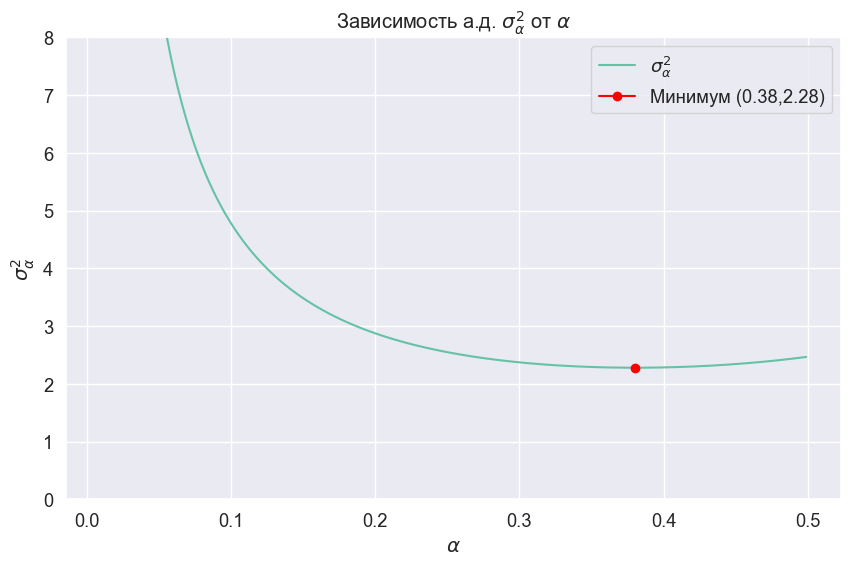

In [88]:
a = np.linspace(0.01, 0.499, 500)
u = sps.cauchy.ppf(1-a)
s = 2/(1-2*a)**2 * ((u-np.arctan(u))/np.pi + a*u**2)
plt.figure(figsize=(10, 6))
plt.plot(a, s, label='$\sigma_{\\alpha}^2$')
x,y = a[np.argmin(s)], s.min()
plt.plot([x], [y], color='red', label=f'Минимум ({x:.2f},{y:.2f})', marker='o')
plt.title('Зависимость а.д. $\sigma_{\\alpha}^2$ от $\\alpha$')
plt.xlabel('$\\alpha$')
plt.ylabel('$\sigma_{\\alpha}^2$')
plt.legend()
plt.ylim((0,8))
plt.show()

При каком значении $\alpha$ асимптотическая дисперсия $\sigma^2_{\alpha}$ минимальна и чему она равна? Ответ можно найти численно.

***Ответ и вывод:** ~~а.д. минимальна при $\alpha=0$ и равна $\pi^2$, как отмечено на графике. Другими словами, а.д. минимальная при $\overline{X}_{\alpha} = \overline{X}$. Можно сделать вывод, что сохранение всей выборки позволяет снизить а.д.~~*  
*Поправил: а.д. минимальна при $\alpha \approx 0.38$ и равна $\approx 2.28$, как отмечено на графике*

<b><font color="#00b565" size="5">===== Конец исправлений =====</font></b>

**3.** 
Сгенерируйте выборку $X_1, ... X_{200}$ из стандартного распределения Коши и постройте доверительные интервалы для следующих случаев:

1) Точный доверительный интервал минимальной длины в параметрической модели $\mathcal{N}(\theta, 1)$ (см. замечание ниже);
2) Точный асимптотический доверительный интервал в параметрической модели распределения Коши со сдвигом, используя  
    a) выборочную медиану;  
    b) усеченное среднее порядка $\alpha$, на котором достигается минимум $\sigma^2_{\alpha}$;  
    c) выборочную медиану;  
    d) медиану средних Уолша;  
    e) любую асимптотически эффективную оценку.  

Изобразите интервалы *на одном* графике полупрозрачными цветами. Точки выборки нужно нанести на график. 

*Замечания.*
1. Первый случай призван проиллюстрировать, что бывает, если используется неправильная модель. На практике вы никогда не знаете, из какого семейства распределений на самом деле получены данные.
2. Производите отладку кода на малых числах.
3. Если не успеваете до дедлайна, можете сократить количество вариантов, потеряв при этом некоторую часть баллов.


**Решение:**

*Для удобства обозначений, в условии ненумерованный список был заменен на нумерованный. Доверительные интервалы:*  
1.) $\left( \overline{X} - z_{\frac{1+\alpha}{2}} \frac{1}{\sqrt{n}}, \overline{X} + z_{\frac{1+\alpha}{2}} \frac{1}{\sqrt{n}} \right)$, z - квантиль стандартного норм. распределения   
2.a) $\left( \hat{\mu} - q_{\frac{1+\alpha}{2}} \frac{1}{\sqrt{n}}, \hat{\mu} + q_{\frac{1+\alpha}{2}} \frac{1}{\sqrt{n}} \right)$, q - квантиль стандартного распределения Коши  
2.b) $\left( \overline{X} - q_{\frac{1+\alpha}{2}} \frac{1}{\sqrt{n}}, \overline{X} + q_{\frac{1+\alpha}{2}} \frac{1}{\sqrt{n}} \right)$, q - квантиль стандартного распределения Коши; выше доказано, что $\alpha=0$   
2.c) (дублируется пункт 2.а про выборочную медиану: видимо, опечатка)  
2.d)  
2.e)  

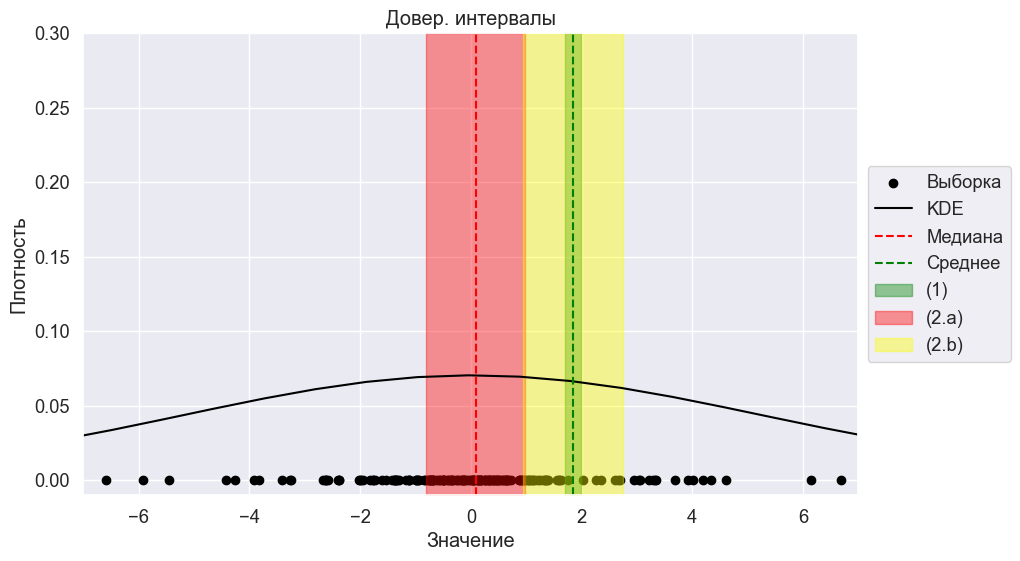

In [150]:
n = 200
sqrt_n = np.sqrt(n)
sample = sps.cauchy.rvs(size=n)  # сама выборка
median, mean = np.median(sample), np.mean(sample)  # статистики
z, q = sps.norm.ppf((1+0.95)/2), sps.cauchy.ppf((1+0.95)/2)  # квантили

plt.figure(figsize=(10, 6))
plt.scatter(sample, [0]*n, color='black', label='Выборка')
sns.kdeplot(sample, color='black', label='KDE')  # для наглядности
plt.axvline(median, color='red', linestyle='--', label='Медиана')
plt.axvline(mean, color='green', linestyle='--', label='Среднее')
plt.fill_betweenx(y=[-0.01, 0.3], x1=mean-z/sqrt_n, x2=mean+z/sqrt_n, color='green', alpha=0.4, label='(1)')
plt.fill_betweenx(y=[-0.01, 0.3], x1=median-q/sqrt_n, x2=median+q/sqrt_n, color='red', alpha=0.4, label='(2.a)')
plt.fill_betweenx(y=[-0.01, 0.3], x1=mean-q/sqrt_n, x2=mean+q/sqrt_n, color='yellow', alpha=0.4, label='(2.b)')
plt.xlim(-7, 7)
plt.ylim(-0.01, 0.3)
plt.xlabel('Значение')
plt.ylabel('Плотность')
plt.title('Довер. интервалы')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

***Вывод:***  
*Для оценки сдвига распределения Коши действительно лучше подходит медиана. Доверительный интервал (2.a) на ее основе содержит истинное - нулевое значение параметра (и содержал при всех запусках ячейки).*  
*Доверительные интервалы на основе выборочного среднего (1) и (2.b) сильно "прыгали" и значительно реже покрывали истинное значение параметра. Это вызвано тем, что у медианы высокая толерантность к выбросам, и тем, что выборка из 200 элементов крайне мала, из-за чего менее робастные оценки сильно флуктуируют.*  
*Доверительный интервал на основе нормальной модели (1) излишне оптимистичен: он очень узок, и при этом сильно ошибается. Это подчеркивает важность правильного выбора модели*  

**4.** Сравните все исследуемые интервалы по величине доли покрытия истинного значения $\theta$, а также по средней длине интервала. Сравнение проведите для всех размеров выборки от 1 до 200 включительно. 

*Замечания.*
1. Производите отладку кода на малых числах.
2. Нужно выполнить достаточное количество семплирований выборок, не менее 1000.
3. Если код работает больше часа, разрешается проводить сравнение для размеров выборок по сетке с некоторым шагом, больше 1. При этом сделайте замеры времени выполнения ячеек с помощью `%%time`.
4. Если не успеваете до дедлайна, можете сократить количество перебираемых вариантов, потеряв при этом некоторую часть баллов.

**Решение:**

100%|██████████| 100/100 [02:16<00:00,  1.36s/it]


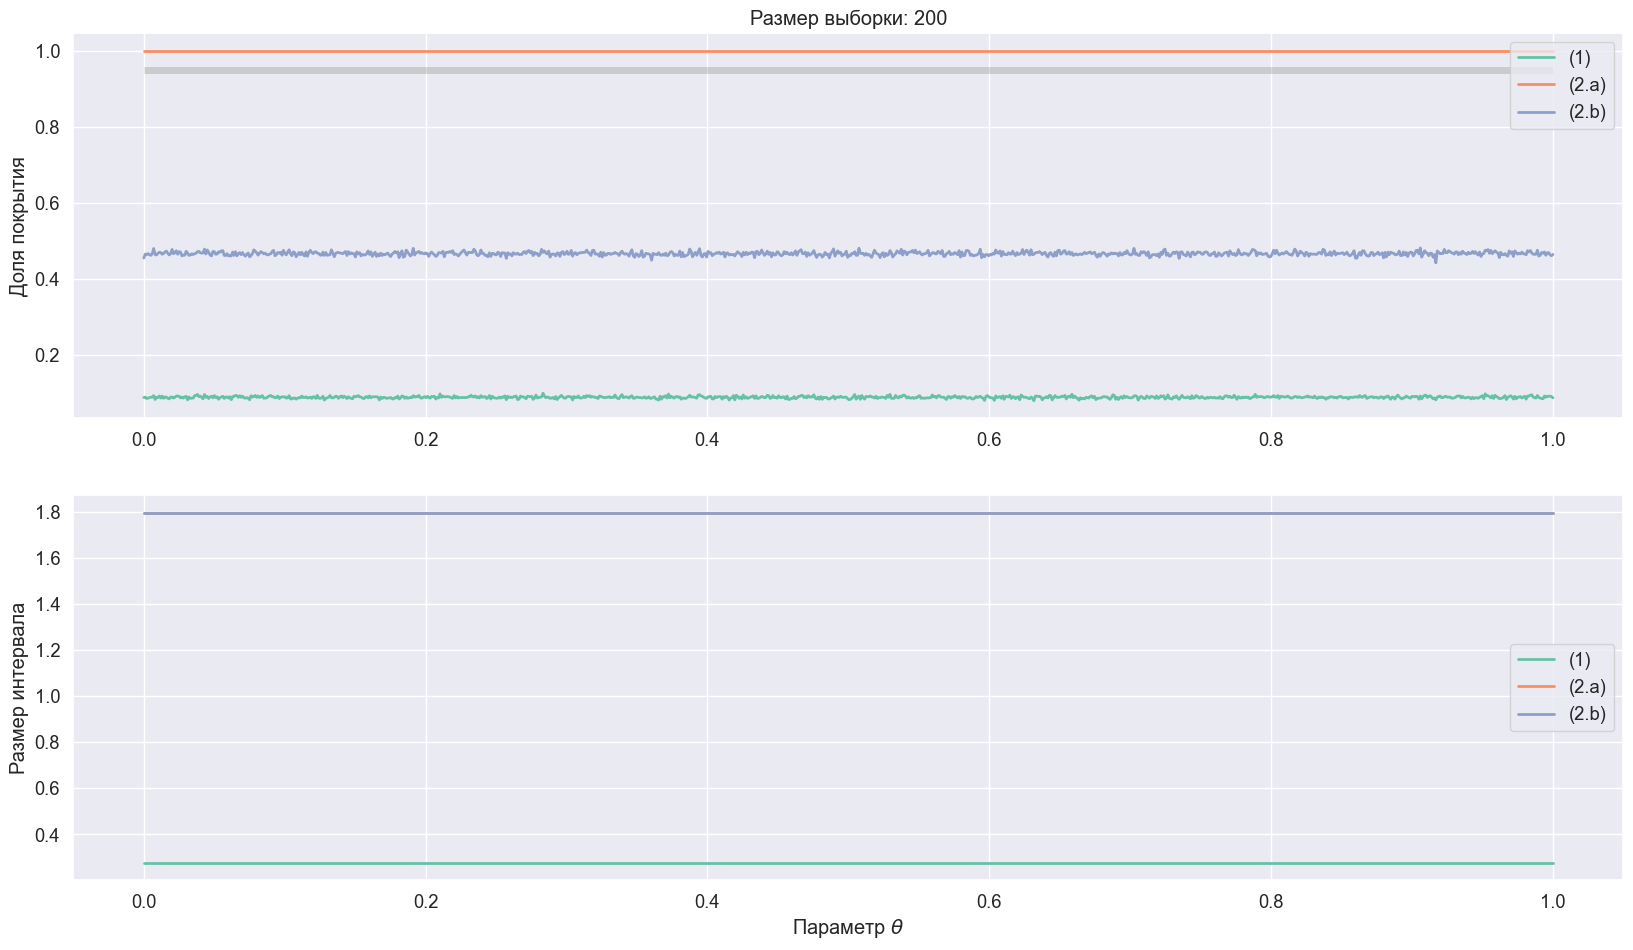

In [179]:
methods = ['(1)','(2.a)','(2.b)']
THETA_GRAN, SAMPLE_SIZE = 1000, 200  # размер сетки параметра, размер выборки
sqrt_n = np.sqrt(SAMPLE_SIZE)

def ci(sample, axis=-1, type=None):
    if type=='(1)':
        mean = np.mean(sample, axis=axis)
        return [mean-z/sqrt_n, mean+z/sqrt_n]
    elif type=='(2.a)':
        median = np.median(sample, axis=axis)
        return [median-q/sqrt_n, median+q/sqrt_n]
    elif type=='(2.b)':
        mean = np.mean(sample, axis=axis)
        return [mean-q/sqrt_n, mean+q/sqrt_n]

def get_coverage(type, sample, theta_space):
    '''Вычисляет долю покрытия параметра доверительным интервалом'''
    left, right = ci(sample, axis=-1, type=type)
    return np.mean((left <= theta_space.reshape(-1, 1)) & (theta_space.reshape(-1, 1) <= right), axis=-1)

def get_ci_len(type, sample):
    '''Вычисляет длину доверительного интервала'''
    left, right = ci(sample, axis=-1, type=type)
    return np.mean(right-left, axis=-1)

def run_few_experiments(sample_size=100, num_exps=1000, theta_gran=100):
    '''Запускает несколько экспериментов по определнию доли покрытия параметра доверительными интервалами из methods'''
    theta_space = np.linspace(0, 1, theta_gran)
    samples = sps.cauchy(loc=theta_space.reshape(-1, 1, 1)).rvs(size=(len(theta_space), num_exps, sample_size))
    return np.array([get_coverage(t, samples, theta_space) for t in methods]), np.array([get_ci_len(t, samples) for t in methods])    

def run_many_experiments(sample_size=100, num_exps=10_000, small_num_exps=100, theta_gran=1000):
    '''Запускает много экспериментов по определению доли покрытия параметра дов. интервалами из methods'''
    results, lens = np.zeros((len(methods), theta_gran)), np.zeros((len(methods), theta_gran))
    launches = num_exps // small_num_exps
    for _ in tqdm(range(launches)):
        A,B = run_few_experiments(sample_size, small_num_exps, theta_gran)
        results, lens = results+A, lens+B
    return results/launches, lens/launches

def plot_results(results, lens):
    '''Отрисовка графиков'''
    theta_space = np.linspace(0, 1, THETA_GRAN)
    _, (ax1, ax2) = plt.subplots(figsize=(20, 11), nrows=2, ncols=1)
    for name, result, length in zip(methods, results, lens):
        ax1.plot(theta_space, result, label=name, lw=2)
        ax2.plot(theta_space, length, label=name, lw=2)
    ax1.hlines(0.95, 0, 1, color='gray', alpha=0.3, lw=5)
    ax1.legend()
    ax1.set_ylabel("Доля покрытия")
    ax1.set_title(f"Размер выборки: {SAMPLE_SIZE}")
    ax2.legend()
    ax2.set_ylabel("Размер интервала")
    ax2.set_xlabel("Параметр $\\theta$")

plot_results(*run_many_experiments(SAMPLE_SIZE))

***Вывод:** единственный метод, для которого доля покрытия параметра превысила 95%, - это метод (2.а) на основе выборочной медианы. Этот результат подтверждает наблюдения из предыдущего пункта задачи об устойчивости оценки на основе медианы. Длина интервала не зависит от значения параметра, но отличается для рассмотренных методов (что тоже было видно в предыдущем пункте задачи)*

*В этой задаче удалось пронаблюдать свойства различных оценок и доверительных интервалов параметра сдвига распределения Коши*